In [1]:
# !pip install ruptures

In [2]:
import pyreadr
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt
%matplotlib inline

wind = pyreadr.read_r('../../data/week3/wind.RData') ['wind'].squeeze()
wind.index = pd.date_range(start='1970-08-30', periods=wind.shape[0], freq='D')

wind.head(3)

1970-08-30    5.09
1970-08-31    3.54
1970-09-01    3.33
Freq: D, Name: wind, dtype: float64

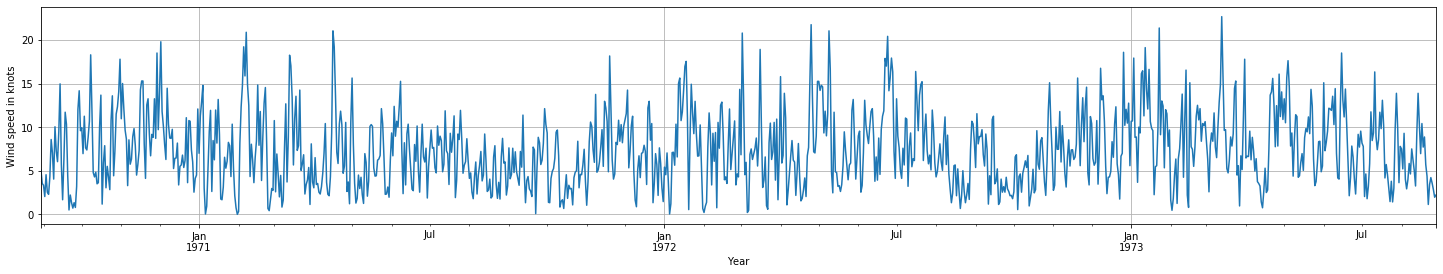

In [3]:
ax = wind.plot(figsize=(25,4), grid=True)
ax.set_xlabel('Year')
ax.set_ylabel("Wind speed in knots");

## Search Methods
- Exact segmentation: dynamic programming
- Exact segmentation: Pelt
- Binary segmentation
- Bottom-up segmentation
- Window-based change point detection

For more info, check out the [docs](http://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/detection/index.html)

## Using Raw Values

In [18]:
points = wind.values

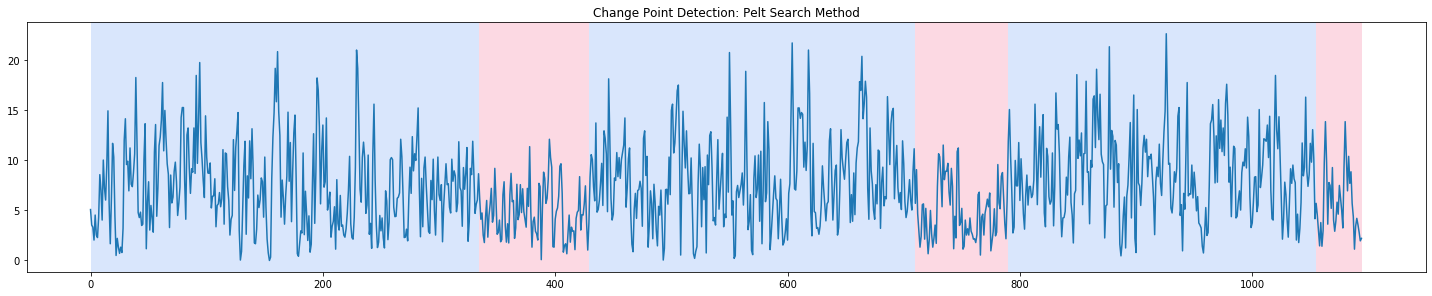

In [19]:
algo = rpt.Pelt(model="rbf").fit(points)
result = algo.predict(pen=4)

fig, ax = rpt.display(points, result, figsize=(20, 4))
ax[0].set_title('Change Point Detection: Pelt Search Method');

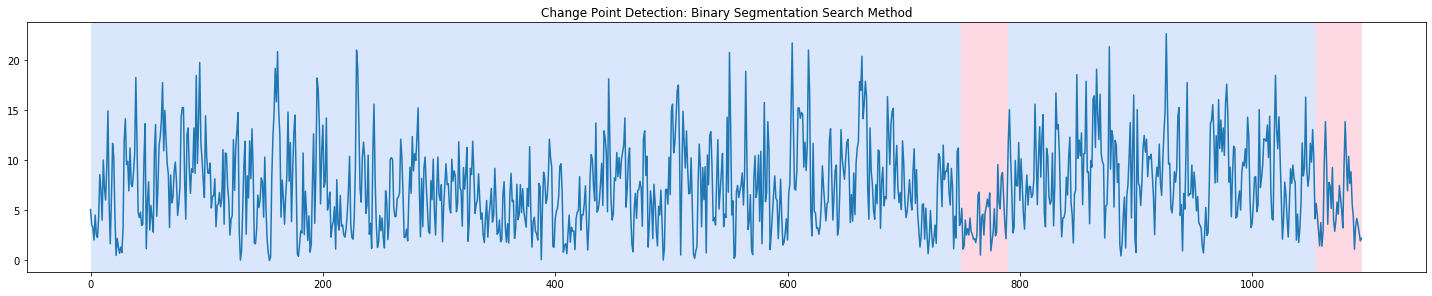

In [20]:
algo = rpt.Binseg(model="rbf").fit(points)
result = algo.predict(pen=4)

fig, ax = rpt.display(points, result, figsize=(20, 4))
ax[0].set_title('Change Point Detection: Binary Segmentation Search Method');

## Using Differences

In [38]:
points_diff = wind.diff().values[1:]

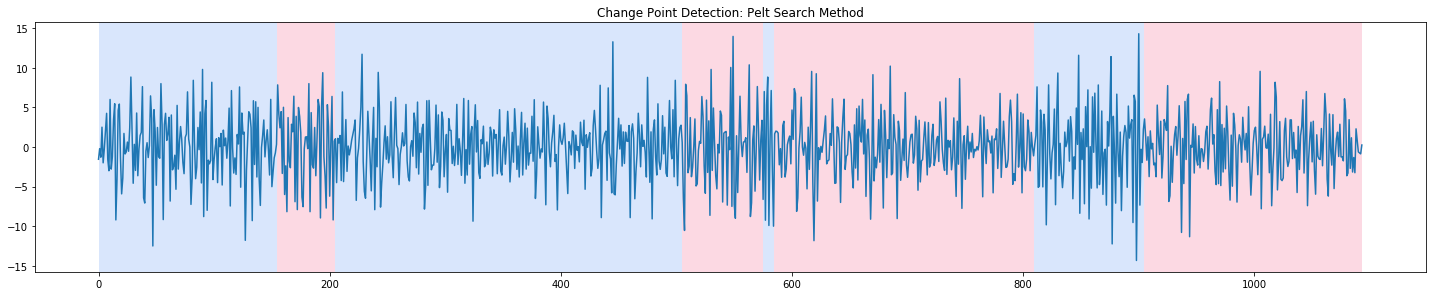

In [40]:
algo = rpt.Pelt(model="rbf").fit(points_diff)
result = algo.predict(pen=1.3)

fig, ax = rpt.display(points_diff, result, figsize=(20, 4))
ax[0].set_title('Change Point Detection: Pelt Search Method');

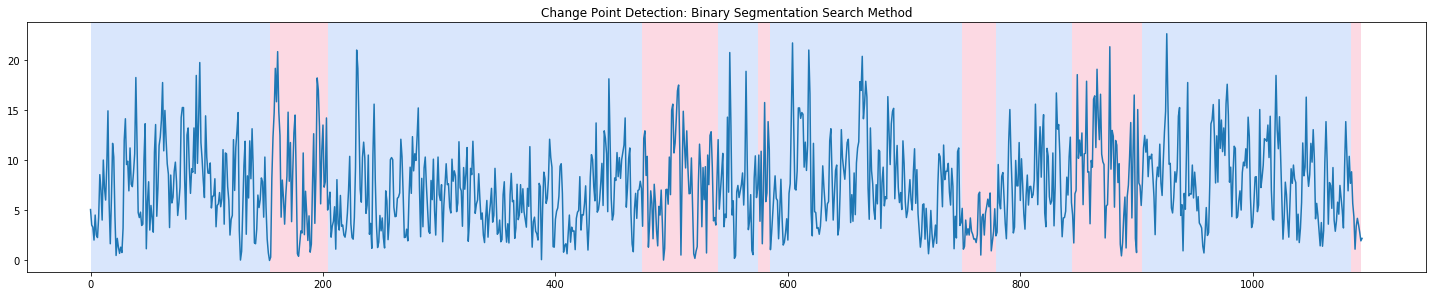

In [39]:
algo = rpt.Binseg(model="rbf").fit(points_diff)
result = algo.predict(pen=1)

fig, ax = rpt.display(points, result, figsize=(20, 4))
ax[0].set_title('Change Point Detection: Binary Segmentation Search Method');